# Modelo de clasificación con Árbol de decisión 
## Autora: Sandra Alonso Paz, estudiante del Máster en Biología Computacional.

In [522]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Importación de los datos
### 1. Importar los datos del CSV

In [523]:
path ='dataset18.csv'
data = pd.read_csv(path)

### 2. Creamos las dos variables que utilizaremos en el modelo
   
    X = Atributos del modelo (columnas del CSV)
    
    Y = Columna target (la que queremos predecir a partir del resto de columnas)

In [524]:
X = data.iloc[:,2:23] #Seleccionamos todas las columnas quitando la columna Unnamed (id de la fila ) y la columna Target.
Y = []

# Como la columna target esta compuesta por valores categóricos ordinales (R y NR) convertimos en valores numéricos (R=0, NR=1) 
for i in range (len(data)):
    if data.Target[i]=='R':
        Y.append(0)
    else:
        Y.append(1) 

# Creación del modelo de árbol de decisión
### 1. Separamos el conjunto de datos en entrenamiento y prueba

In [525]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.15, random_state=125)
# Tuve que disminuir el conjunto de prueba porque los resultados que obtenía dejaban ver que 
# el modelo no estaba aprendiendo todo lo bien que debería

# Convertimos a array el conjunto de X (Y ya es un array)
XTrain = XTrain.values
XTest = XTest.values

print('Tamaño del conjunto de entrenamiento:', len(XTrain))
print('Tamaño de la columna objetivo del conjunto de entrenamiento:', len(yTrain))
print('Tamaño del conjunto de prueba:', len(XTest))
print('Tamño de la columna objetivo del conjunto de prueba:', len(yTest))

Tamaño del conjunto de entrenamiento: 45
Tamaño de la columna objetivo del conjunto de entrenamiento: 45
Tamaño del conjunto de prueba: 8
Tamño de la columna objetivo del conjunto de prueba: 8


### 2. Instanciamos un GridSeacrgCV para averiguar que parámetros ajustan mejor el modelo

In [526]:
param_grid = {'min_samples_leaf': [2,5,7,10],
              'min_samples_split': [2, 5, 7, 10],
              'max_depth':[2,5,10,12,15,20,100],
              'criterion':['entropy','gini'],
              'splitter': ['best', 'random'],
              'random_state':[125]}

# Creamos un GridSearchCV que permite evaluar y seleccionar de forma sistemática los parámetros de nuestro modelo. 
# Indicándole un modelo y los parámetros a probar, puede evaluar el rendimiento del primero en función de los 
# segundos mediante validación cruzada.
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 5, 10, 12, 15, 20, 100],
                         'min_samples_leaf': [2, 5, 7, 10],
                         'min_samples_split': [2, 5, 7, 10],
                         'random_state': [125],
                         'splitter': ['best', 'random']})

In [527]:
print("Mejor estimación de parámetros según GridSearchCV:")
model = clf.best_estimator_
model.fit(XTrain , yTrain)

Mejor estimación de parámetros según GridSearchCV:


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=125)

# Cross Validation

In [528]:
print("Mejor resultado de la cross validation del modelo con mejores resultados: " +str(clf.best_score_))

Mejor resultado de la cross validation del modelo con mejores resultados: 0.7333333333333334


# Predicciones y estudio de resultados

In [529]:
# Realizamos las predicciones con el modelo óptimo sobre el conjunto de datos de entrenamiento
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparamos con la columna Target y comprobamos cuantos aciertos ha habido
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [530]:
# Realizamos las predicciones con el modelo óptimo sobre el conjunto de datos de prueba
yhatTest = model.predict(XTest)
contTest = 0

# Comparamos con la columna Target y comprobamos cuantos aciertos ha habido
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


In [531]:
print('Precisión final en el conjunto de datos de entrenamiento: ' + str(contTrain/len(yTrain)))
print('Precisión final en el conjunto de datos de prueba: ' + str(contTest/len(yTest)))

Precisión final en el conjunto de datos de entrenamiento: 0.8444444444444444
Precisión final en el conjunto de datos de prueba: 0.75


# Matriz de confusión
### 1. Matriz de confusión del conjunto de datos del entrenamiento

In [532]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Matriz de confusión (Entrenamiento)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Datos de entrada:  ' + str(np.array(yTrain)))
print('Predicción:        ' +str(yhatTrain))

----------------Matriz de confusión (Entrenamiento)------------------
[[22  1]
 [ 6 16]]
Datos de entrada:  [0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0
 0 1 0 1 0 1 1 1]
Predicción:        [0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0
 0 1 1 0 0 1 1 0]


Estos resultados pueden ser interpretados de la siguiente manera:
1. 22 verdaderos positivos (Verdaderamente responderán al tratamiento)
2. 16 verdaderos negativos (Verdaderamente no responderán al tratamiento)
3. 1 falsos positivos (Fueron clasificados como mala respuesta al tratamiento, sin embargo, responderán correctamente al mismo)
4. 6 falsos negativos (Fueron clasificados como buena respuesta al tratamiento, sin embargo, no responderán al mismo)

### 2. Resultados obtenidos del conjunto de entrenamiento

In [533]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86        23
           1       0.94      0.73      0.82        22

    accuracy                           0.84        45
   macro avg       0.86      0.84      0.84        45
weighted avg       0.86      0.84      0.84        45



### 3. Matriz de confusión del conjunto de datos de prueba

In [534]:
print('----------------Matriz de confusión (Prueba)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Datos de entrada:  ' + str(np.array(yTest)))
print('Predicción:        ' +str(yhatTest))

----------------Matriz de confusión (Prueba)------------------
[[5 2]
 [0 1]]
Datos de entrada:  [0 0 0 1 0 0 0 0]
Predicción:        [1 0 0 1 1 0 0 0]


Estos resultados pueden ser interpretados de la siguiente manera:
1. 5 verdaderos positivos (Verdaderamente responderán al tratamiento)
2. 1 verdaderos negativos (Verdaderamente no responderán al tratamiento)
3. 2 falsos positivos (Fueron clasificados como mala respuesta al tratamiento, sin embargo, responderán correctamente al mismo)
4. 0 falsos negativos (Fueron clasificados como buena respuesta al tratamiento, sin embargo, no responderán  al tratamiento)

### 4. Resultados obtenidos del conjunto de prueba

In [535]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.33      1.00      0.50         1

    accuracy                           0.75         8
   macro avg       0.67      0.86      0.67         8
weighted avg       0.92      0.75      0.79         8



# Visualización de resultados

In [536]:
from sklearn.tree import export_text

texto_modelo = export_text(
                    decision_tree = model,
                    feature_names = ['n_rs3188513', 'n_rs9960669', 'n_rs2602',
       'n_rs5445365', 'n_rs133061', 'n_rs10102851', 'n_rs8375668',
       'n_rs3015353', 'n_rs3229523', 'n_rs6236416', 'n_rs5274755',
       'n_rs9280789', 'n_rs2515462', 'n_rs9025039', 'n_rs94282819',
       'n_rs344903', 'n_rs0370', 'n_rs9072249', 'n_rs0220', 'n_rs833068',
       'n_rs933069']
               )
print(texto_modelo)

|--- n_rs133061 <= 1.50
|   |--- n_rs344903 <= 1.50
|   |   |--- class: 0
|   |--- n_rs344903 >  1.50
|   |   |--- n_rs0220 <= 0.50
|   |   |   |--- n_rs2602 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- n_rs2602 >  1.50
|   |   |   |   |--- class: 0
|   |   |--- n_rs0220 >  0.50
|   |   |   |--- n_rs0370 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- n_rs0370 >  1.50
|   |   |   |   |--- class: 1
|--- n_rs133061 >  1.50
|   |--- n_rs2515462 <= 0.50
|   |   |--- class: 1
|   |--- n_rs2515462 >  0.50
|   |   |--- class: 1



Profundidad del árbol: 4
Número de nodos terminales: 7


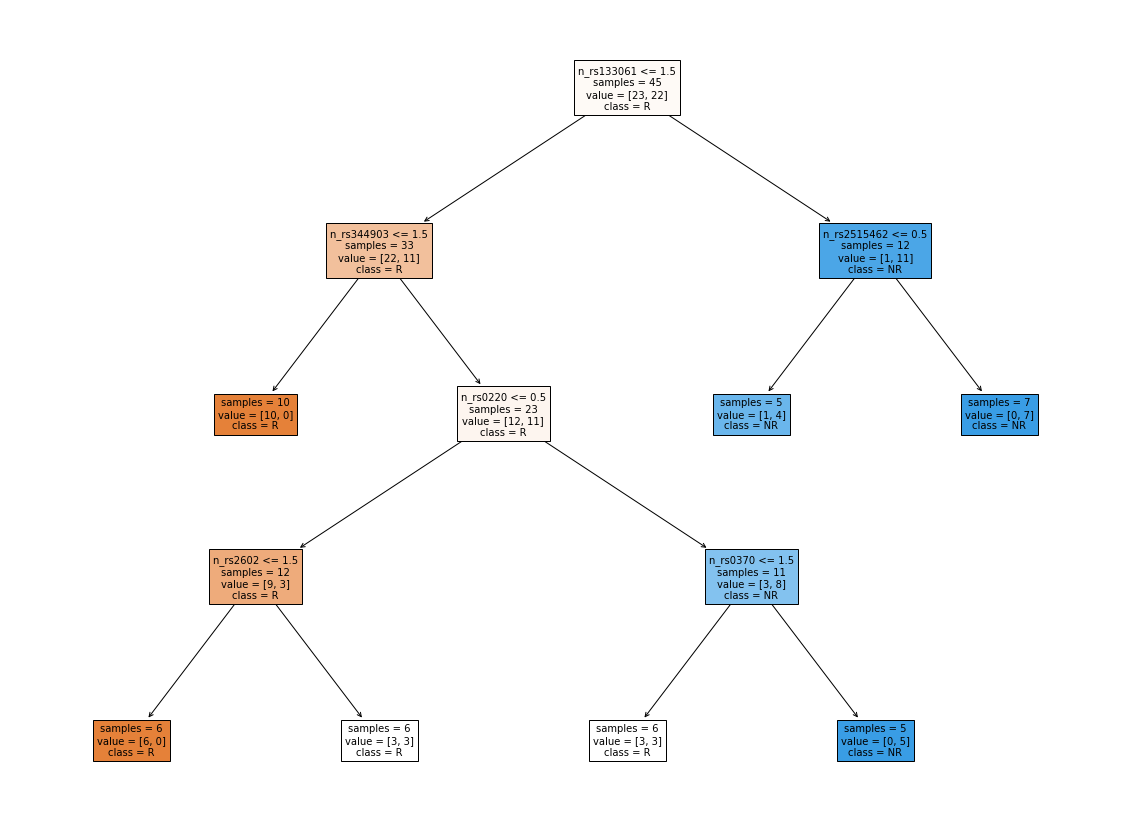

In [537]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 15))

print(f"Profundidad del árbol: {model.get_depth()}")
print(f"Número de nodos terminales: {model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model,
            feature_names = ['n_rs3188513', 'n_rs9960669', 'n_rs2602',
       'n_rs5445365', 'n_rs133061', 'n_rs10102851', 'n_rs8375668',
       'n_rs3015353', 'n_rs3229523', 'n_rs6236416', 'n_rs5274755',
       'n_rs9280789', 'n_rs2515462', 'n_rs9025039', 'n_rs94282819',
       'n_rs344903', 'n_rs0370', 'n_rs9072249', 'n_rs0220', 'n_rs833068',
       'n_rs933069'],
            class_names   = ['R','NR'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

# Bibliografía
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier

https://www.maximaformacion.es/blog-dat/que-son-los-arboles-de-decision-y-para-que-sirven/

https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/

https://moodle.upm.es/titulaciones/oficiales/pluginfile.php/10065396/mod_resource/content/2/Unit2-5-SupervisedLearning-ClassificationRegression-DecisionTrees.pdf